In [2]:
import numpy as np

# Some things work differently in the Python IDE than they do in org-mode.

# Lets assume we want to make a list of integers from 0-9 raised to powers of x
# where x is a range of integers from 0-3.
X = np.arange(0, 4)
print(X)

for x in X:
W = []
W += [0**x]
W += [1**x]
W += [2**x]
W += [3**x]
W += [4**x]
W += [5**x]
W += [6**x]
W += [7**x]
W += [8**x]
W += [9**x]

print(W)

# There are mutiple errors in this code. IDE can help us identify where the problem is
# and or new shortcuts can help us fix it more efficiently.

IndentationError: expected an indented block (<ipython-input-2-4aa7594c31b8>, line 11)

    import numpy as np
    
    # There are generally two ways to approach list generation:
    
    # 1) Create an empty list and add to it as needed
    LIST = []  # Empty list
    
    LIST = LIST + [1]  # Adding a list that contains 1 to the empty list 
    print(LIST)
    
    # This is syntactically the same as above
    LIST += [2]
    print(LIST)
    
    # We can do this using variables as well
    i = 3
    LIST += [i]
    print(LIST)
    
    # 2) Create a list of the size we need to begin with
    NEW_LIST = np.zeros(3)
    print(NEW_LIST)
    
    # Now we have to index the list to change the entires
    NEW_LIST[0] = 1
    print(NEW_LIST)
    
    NEW_LIST[1] = 2
    print(NEW_LIST)
    
    NEW_LIST[2] = 3
    print(NEW_LIST)
    
    # Fun fact: A computer scientist always prefers the second method.
    # This is because it is less computationally intensive to change the value
    # in an existing list than it is to continuosuly expand the size of your list.

[1]
[1, 2]
[1, 2, 3]
[ 0.  0.  0.]
[ 1.  0.  0.]
[ 1.  2.  0.]
[ 1.  2.  3.]



In [ ]:
import numpy as np

# There are generally two ways to approach list generation:

# 1) Create an empty list and add to it as needed
LIST = []  # Empty list

LIST = LIST + [1]  # Adding a list that contains 1 to the empty list 
print(LIST)

# This is syntactically the same as above
LIST += [2]
print(LIST)

# We can do this using variables as well
i = 3
LIST += [i]
print(LIST)

# 2) Create a list of the size we need to begin with
NEW_LIST = np.zeros(3)
print(NEW_LIST)

# Now we have to index the list to change the entires
NEW_LIST[0] = 1
print(NEW_LIST)

NEW_LIST[1] = 2
print(NEW_LIST)

NEW_LIST[2] = 3
print(NEW_LIST)

# Fun fact: A computer scientist always prefers the second method.
# This is because it is less computationally intensive to change the value
# in an existing list than it is to continuosuly expand the size of your list.

-   There are a few tools for the purpose of generating simple lists

[numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)

[numpy.arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)

[range](https://www.google.com/#safe=off&q=range)



In [ ]:
import numpy as np

# np.linspace generates an array of 'num' floats between the first and last value
L1 = np.linspace(1, 50, num=50)
print(L1)

# np.arange generates an array of values evenly spaced by step
L2 = np.arange(1, 50, step=2)
print(L2)

# You can make these counting backwards as well
L3 = np.arange(50, 1, step=-2)
print(L3)

# Same as np.arange, but returns a list instead of an array
L4 = range(1, 50, 2)
print(L4)

-   Here are some examples of how to produce a list of the squared values for integers from 0-4.



In [ ]:
import numpy as np

# The brute force approach
W = [0**2]
W += [1**2]
W += [2**2]
W += [3**2]
W += [4**2]

print(W)

# The for statement
X = []
for i in range(5):
   X += [i**2]

print(X)

# List comprehension
Y = [i**2 for i in range(5)]

print(Y)

# An array
Z = np.arange(0, 5) ** 2

print(Z)

# Mapping
def sqr(x):
    return x ** 2

A = map(sqr, range(5))

print(A)

-   Just because certain methods are less-efficient then others in some applications, doesn't mean this will be true for all applications.




### What are some of the advantages and disadvantages to using each of these looping methods?



-   The examples thus far have been fairly trivial, but we are only using fairly simple applications of loops for this class.




## Examples debugging from an expert perspective



-   The following example problem was provided via the course mailing list.

A gaseous feed of pure A (1 mol/L) enters a plug flow reactor of 2 L and reacts as follows:

\begin{equation}
2\;A \rightarrow B \quad -r_A= 0.005\;C_A^2
\end{equation}

Find the what feed rate (L/min) will give an outlet concentration Ca = 0.5 mol/L.

-   The solution provided is complex and contains multiple extra steps in order to utilize fsolve to find a precise solution.

-   Debugging such complex multi-stage code can be tedious and daunting when attempted all at once.

-   Fortunately, when problems have multiple stages we can use the tools outlined in the first section to break it into more manageable pieces.



In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

Ca0 = 1  # mol/L
k = 0.005 # mol/L^2 s
Vspan = np.linspace(0, 2) # L
v0span = np.linspace(0.0001, 0.2)
Ca_target = 0.5


def dFdV(F, V, v0):

    Fa, Fr = F
    Ft = sum(F)
    Ft0 = Ca0 * v0
    v = v0 * Ft / Ft0

    Ca = Fa / v
    ra = -k * Ca**2
    rr = -ra / 2.

    dFadV = ra
    dFrdV = rr

    return [dFadV, dFrdV]


def Ca(v0):
    '''We need to create a function of Ca(v0) to use fsolve'''
    F = odeint(dFdV, [Ca0 * v0, 0.], Vspan)
    v = v0 * sum(F[-1]) / (Ca0 * v0)
    C = F / v
    return C

# odeint cannot accept an array when returning mutliple flowrates
# Therefore, we create a proxy function to perfrom essentially the
# same task as Ca, it will run independently of odeint.
proxy_Ca = interp1d(v0span, map(Ca, v0span), 'cubic')

def obj(v0):
    '''Our objective function: Ca = 0.5'''
    return proxy_Ca(v0) - Ca_target

v0_sol = fsolve(obj, 0.01)
print('Volumetric flow rate: {:.2f} L/min'.format(v0_sol[-1]*60))
print('Exit concentration of Ca: {:.1f} mol/L'.format(Ca_target))

plt.plot(v0span*60, map(Ca, v0span), 'b-', label='')
plt.plot(v0span*60, proxy_Ca(v0span), 'r--', label='')
plt.plot(v0_sol*60, Ca(v0_sol[0]), 'ro', label='Solution')
plt.xlabel('Volumetric flow rate (L/min)')
plt.ylabel('$C_A$ (mol/L)')
plt.tight_layout()
plt.show()


### The first error produced from the code block looks as follow:



    Traceback (most recent call last):
      File "<stdin>", line 41, in <module>
      File "<stdin>", line 33, in Ca
      File "/usr/local/lib/python2.7/dist-packages/scipy/integrate/odepack.py", line 215, in odeint
        ixpr, mxstep, mxhnil, mxordn, mxords)
    TypeError: dFdV() takes exactly 3 arguments (2 given)

-   Notice that there are multiple error messages reported for this more complex example.

-   This is called the "traceback" which provides a list of functions utilized from the line that produced the error in your code, to the actual function which produced the error.

-   As an expect, I often look at the last line first. If the error message is one that I recognize, I can usually resolve the issue quickly.

-   In this case, "dFdV() takes exactly 3 arguments (2 given)" is fairly informative. I have a function named dFdV(F, V, v0) which takes a molar flowrate, volume, and volumetric flowrate. At some location, I am apparently only giving this function 2 of those 3 variables.

-   To quickly identify the location this is happening, I just to the top of the traceback.

-   I know that "<stdin>" refers to code that I am executing, so I first find line 41 in python IDE mode.

-   Line 41 contains a call to the Ca function, which is also mentioned in the next line of the traceback, so I move to line 33 next.

-   Line 33 contains a call the the dFdV function, and now I can see that the additional argument v0 is not being provided to my function.




### The error message for the next bug is less helpful than the last:



    Traceback (most recent call last):
      File "<stdin>", line 41, in <module>
      File "/usr/local/lib/python2.7/dist-packages/scipy/interpolate/interpolate.py", line 412, in __init__
        _Interpolator1D.__init__(self, x, y, axis=axis)
      File "/usr/local/lib/python2.7/dist-packages/scipy/interpolate/polyint.py", line 61, in __init__
        self._set_yi(yi, xi=xi, axis=axis)
      File "/usr/local/lib/python2.7/dist-packages/scipy/interpolate/polyint.py", line 126, in _set_yi
        raise ValueError("x and y arrays must be equal in length along "
    ValueError: x and y arrays must be equal in length along interpolation axis.

-   Most of the traceback isn't that helpful either, since it refers to scipy package functions.

-   So, the gist of the error is that there are two arrays: x and y that are not the same shape, but should be, and the problem origionated in my code at line 41 (The last time "<stdin>" is referenced).

-   This time I will need to manipulate the variables to determine what is wrong.

-   Line 41 contains the scipy.interp1d function which takes two arrays as arguments. It seems likely that these are the x and y arrays refereed to in the error message.

-   Commenting out line 41 and everything after it will let me look at the size of each array.

-   Now I can see that "map(Ca, v0span)" is significantly larger than "v0span".

-   I know that the map function returns a list of results from the Ca function for each element from v0span, so the Ca function must not be generating what I thought.

-   The purpose of the Ca function is to produce the exit concentration of Ca for a given v0.

-   Passing a single v0 through the Ca function, I can now see that the function is returning a list of Ca and Cr values representing concentrations through the extent of the reactor.

-   Now I know that I need to select the exit concentration from the list to have the function produce the desired result.

-   Finally, I can uncomment the final section of my code and everything runs as planned.




### Other bugs may be present without producing errors



IMPORTANT NOTE: The most difficult bugs to fix are the ones that don't produce an error message at all!

-   These situations rely upon your expert knowledge of how these systems work, what is a reasonable solution, and understanding of how basic coding features operate.

-   Lets practice these coding skills now by working through the assignment below in class:

[debugging](debugging)

-   Discussion with your neighbore on how to solve is problems is encouraged!




# Basic concepts of Python wrappers



A large number of you expressed interest in knowing how wrappers operate.

-   This is likely due to the fact that we shown examples of them for the quantities package as well as the uncertainties package.

-   While these packages can be useful, their implementation is often tedious for more complex functions.

-   Knowing how to use these packages is not required for the course, although it can be helpful for simple applications!

To understand the need for wrappers, it is helpful to understand some of the origin of Python code.

-   Python is a culmination of modules from many different developers, often with different purposes in mind (like numpy, scipy, and matplotlib).

-   That means many that not all of the modules we use designed to support features from other modules.

-   This is particularly true of less widely used modules like quantities and uncertainties.

-   Therefore, to make their functions compatible with other, more commonly used modules, these developers implement wrappers which allow them to manipulate those functions without actually changing them.

-   Here is an example of the most basic wrapper implementation.



In [3]:
# First we define the wapper.
def wrap():


    # Next we define which function we are decorating
    # This is required syntax for the @wrap command
    def decorate(func):

        # Finally, we specify what to do when the function is called
        # For a standard function, this is to return the results only!
        def call(*args, **kwargs):

            # First, we tell the wrapper to inform us of the arguments
            print('The arguments being passed to call are:', args)
            print('The key-word arguments in this example:', kwargs)

            # Then we have it do the usual thing
            result = func(*args, **kwargs)

            return result

        return call

    return decorate


# This wrapper doesn't do much!
@wrap()
def divide(x, y, an_extra_parameter=0):
   """This is someone elses function, which I can't change
   """
   return x / float(y)

 
print(divide(1, 2, an_extra_parameter='Bob'))

The arguments being passed to call are: (1, 2)
The key-word arguments in this example: {'an_extra_parameter': 'Bob'}
0.5


-   In more complex examples, we can add our own additional functions to the wrapper.

-   Consider how we might prevent the function from returning an error if we were to divide by zero.



In [4]:
def wrap(pre, post):
    def decorate(func):
        def call(*args):

            # Now we execute the pre-function and post-functions as well
            pre(func, *args)
            result = func(*args)
            post(func, *args)
            return result
        return call
    return decorate




def trace_in(func, *args):
   print('trace_in is being run')

def trace_out(func, *args):
   print('trace_out is being run')


@wrap(trace_in, trace_out)
def divide(x, y):
   """This is someone elses function, which I can't change
   """
   return x / float(y)

print(divide(1, 2))

trace_in is being run
trace_out is being run
0.5


-   Finally, the pre-function and post-function can be written in such a way that the original function achieves the desired effect without being edited directly.



In [5]:
import numpy as np


def wrap(pre, post):
    def decorate(func):
        def call(*args):

            # These end-plate functions can be used to manipulate
            # the input
            args = pre(func, *args)
            result = func(*args)
            post(func, result)
            return result
        return call
    return decorate



def trace_in(func, *args):
    print('trace_in is checking to make sure y != 0')

    x, y = args

    if y == 0:
        return (x, np.nan)
    else:
        return (x, y)


def trace_out(func, result):
    print('trace_out is being run')

    if np.isnan(result):
        print('[[https://pogoprinciple.files.wordpress.com/2012/02/divide3.jpg]]')

@wrap(trace_in, trace_out)
def divide(x, y):
   """This is someone elses function, which I can't change
   """
   return x / float(y)

print(divide(1, 0))

trace_in is checking to make sure y != 0
trace_out is being run
[[https://pogoprinciple.files.wordpress.com/2012/02/divide3.jpg]]
nan


-   Previously, Dr. Kitchin has demonstrated how we would wrap fsolve to account for units: [./rxns-book/wrapping-up-introduction.md](./rxns-book/wrapping-up-introduction.md).

-   The quantities package does not provide function wrapping like uncertainties does, so in this example the wrapper is hard-coded around the fsolve function.

-   Even the uncertainties wrapper may not behave correctly with all functions. Consider using Monte-Carlo techniques instead as they tend to be more robust.




# Review of estimating parameters from experimental kinetics data



-   Uncertainty is everywhere in engineering and learning how to manage it is a valuable skill even outside of reactor design.

-   In general, when fitting to models we categorize into two main topics.




## Linear solvers:



-   Linear solvers are trivially easy to solve and do not require an initial guess.

-   However, not all data follows a linear trend and transforming models into linear form often fit more poorly than non-linear fits.

[numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

[numpy.poly1d](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html)



In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

# Create a third-order polynomial to fit the data
fit, cov = np.polyfit(x, y, 4, cov=True)

std_dev = np.diag(cov)
print(std_dev)

p = np.poly1d(fit)

# Create a thirtieth-order polynomial to fit the data
p30 = np.poly1d(np.polyfit(x, y, 30))

xp = np.linspace(-2, 6, 100)

plt.figure(figsize=(6, 4))
plt.plot(x, y, '.')
plt.plot(xp, p(xp), '-')
plt.plot(xp, p30(xp), '--')
plt.ylim(-2, 2)
plt.tight_layout()
plt.savefig('./images/polynomial-overfitting.png')

ValueError: the number of data points must exceed order + 2 for Bayesian estimate the covariance matrix

![img](./images/polynomial-overfitting.png)

-   The figure shown above demonstrates a common mistake made by beginners.

-   A model is only as powerful as its predictive capability. Although the 30th-order polynomial fits the data perfectly, its predictive capability is dubious at best.

-   This also underlines the importance of visually inspecting the interpolations and extrapolations of your fit.

-   Generally speaking, interpolations are more predictive than extrapolations, although this may not be true for poor fitting models.

-   Also note that while you can return the fitting statistics, polyfit will not calculate a confidence interval for you.

A more flexable linear fitting tool which calculates confidence intervals
[pycse.regress](https://www.google.com/#safe=off&q=pycse.regress)



[ 0.008723   -0.54426774  1.4283812 ]
[[ 0.00501202  0.01243399]
 [-0.70289172 -0.38564377]
 [ 1.05618245  1.80057995]]


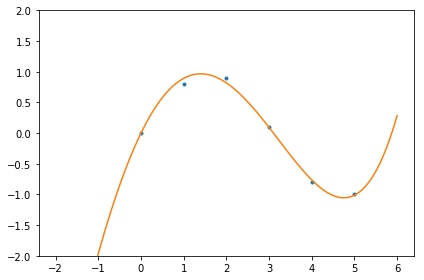

In [7]:
import numpy as np
from pycse import regress
import matplotlib.pyplot as plt

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

# We can control which features we fit to.
X = np.column_stack([x**4, x**2, x**1])

pars, pint, se = regress(X, y, alpha=0.05)

print(pars)
print(pint)

xp = np.linspace(-2, 6, 100)

# Unfortunatly, regress does not 
def fit(x, A, C, D):
    return A*x**4 + C*x**2 + D*x**1

plt.figure(figsize=(6, 4))
plt.plot(x, y, '.')
plt.plot(xp, fit(xp, *pars), '-')
plt.ylim(-2, 2)
plt.tight_layout()
plt.savefig('./images/polynomial-regress.png')

![img](./images/polynomial-regress.png)

-   By removing the 3rd and 0th order terms, the fit becomes much more stable at the extrapolated ends.

-   Assuming there is some error associated with the initial data, I could make a compelling argument that the simpler model provides a more accurate representation of the trend, and is potentially more predictive.

-   Unfortunatly, regress does not return have a poly1d function for convenient plotting, so we must create our own function if we want to demonstrate the interpolation graphically.

-   However, poly1d can be used if the traditional polynomial form is used.




## Non-linear solvers:



-   Non-linear solvers are not as simple to solve and sometimes no good solutions can be found at all.

-   These fitting methods rely on initial guesses and can be quite sensitive to these guesses, especially at higher-orders.

-   These solvers are also very flexible and can at least attempt to fit to any model provided.

[scipy.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.curve_fit.html)

[pycse.nlinfit](https://www.google.com/#safe=off&q=pycse.nlinfit)



[ 0.008723   -0.54426774  1.4283812 ]
[ 0.008723   -0.54426774  1.4283812 ]
[[ 0.00597818  0.01146782]
 [-0.66159357 -0.42694192]
 [ 1.15308533  1.70367707]]


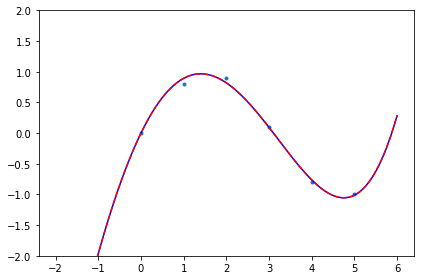

In [8]:
import numpy as np
from pycse import regress
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pycse import nlinfit

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])


def fit(x, A, C, D):
    return A*x**4 + C*x**2 + D*x**1


# This comes from the linear fit above
initial_guess = [1, 1, 1]

pars, pcov = curve_fit(fit, x, y, initial_guess)
pars2, pint, se = nlinfit(fit, x, y, initial_guess, 0.05)

print(pars)
print(pars2)

print(pint)

xp = np.linspace(-2, 6, 100)

plt.figure(figsize=(6, 4))
plt.plot(x, y, '.')
plt.plot(xp, fit(xp, *pars), 'b-')
plt.plot(xp, fit(xp, *pars), 'r--')
plt.ylim(-2, 2)
plt.tight_layout()
plt.savefig('./images/polynomial-curvefit.png')

![img](./images/polynomial-curvefit.png)

-   Interestingly, even though the fitted parameters are found to be the same, nlinfit predicts a smaller confidence interval than regress when using the same model.

-   This probably shouldn't be the case, although I am only 95% confident!

-   Based on the example above, for fits with few parameters, non-linear fitting techniques tend to be just as viable as linear fits.

-   This will not be the case for models with large numbers of variables.

-   We can also see here how a linear fit could potentially be used to identify good initial guesses for similar models using non-linear fits.

Lets end with an exercise in identifying good models to fit data based on actual work being done in the Kitchin group:

[free-energy-regression](free-energy-regression)

